<a href="https://colab.research.google.com/github/heidaralavi/Gas-Prj/blob/main/Linear_Regression_using_PyTorch_for_gas_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
url = 'https://raw.githubusercontent.com/heidaralavi/Gas-Prj/main/total.csv'
df=pd.read_csv(url)
df=df.set_index('Date')
df.head()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
Date,,,,,,,,,,,,,,,,,,,
3/22/2019,9.068056,1944.333333,66.943333,21.596667,23.000000,12130.79,6.178099,129.977407,113.830519,96.924823,823.695961,947.918406,16.426996,1.720463,1.722029,33.128261,185.063912,141.628364,196364
3/23/2019,8.997183,2014.000000,66.873333,21.420000,23.533333,12383.61,6.197217,130.267644,111.230717,97.945284,791.477252,928.687125,16.367289,1.720708,1.634924,32.501389,183.892294,145.570481,209304
3/24/2019,8.795833,2036.909091,66.873333,21.246667,23.400000,12413.71,5.976046,133.678219,111.999794,99.243076,830.765571,939.656421,18.876778,1.720636,1.650556,31.961806,180.630365,173.127236,206200
3/25/2019,8.850536,2028.555556,66.986667,21.990000,23.583333,12277.02,5.978728,129.616905,114.068555,102.256167,825.551090,924.538606,21.236601,1.720821,1.590273,31.493056,177.220492,179.281210,203772
3/26/2019,9.006061,2034.181818,67.096667,21.846667,19.883333,9942.13,4.718885,138.999936,115.877855,100.122762,724.071424,910.241250,18.896511,1.708230,1.278280,26.135069,163.096300,129.430960,200120


نرمال سازی داده ها

In [106]:
col=df.columns
data=df.values
ind = df.index.values

In [107]:
data.shape

(837, 19)

In [108]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
normal_data = trans.fit_transform(data)
normal_df=pd.DataFrame(normal_data,columns=col,index=ind)
normal_df.describe()

,Moisture_600,Blaine_After_HPGR,Tfe_Before_Mixer,FeO_Before_Mixer,Online_hours,Grate_Feed(ton),Grate_Speed(rpm),Depth(mm),EP1_Temp(deg),EP2_Temp(deg),Grate_Zoon3_Temp(deg),Grate_Zoon4_Temp(deg),Amb_Temp(deg),KL1_Speed(rpm),AN1_Speed(rpm),730FN1_Damper,730FN1_Amp,AN1_Zoon3_Temp(deg),Gas_Consumption(Nm3)
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.477950,0.511380,0.585041,0.576710,0.945827,0.671993,0.659803,0.454869,0.241933,0.624765,0.758378,0.404087,0.526687,0.681928,0.626441,0.475348,0.768247,0.623761,0.410754
std,0.155161,0.179270,0.177414,0.184786,0.140101,0.157386,0.175665,0.173881,0.134492,0.158191,0.138106,0.146160,0.255519,0.173184,0.169147,0.207824,0.172493,0.198828,0.174579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374966,0.385587,0.460066,0.442487,0.978261,0.614517,0.562485,0.306938,0.151815,0.554199,0.685404,0.343648,0.301951,0.515915,0.558394,0.362370,0.711797,0.493290,0.283447
50%,0.474625,0.498991,0.593399,0.578238,1.000000,0.699525,0.662921,0.459551,0.209289,0.622071,0.773002,0.449293,0.513398,0.730826,0.627361,0.426318,0.789032,0.630918,0.415035
75%,0.587626,0.629318,0.709571,0.715544,1.000000,0.759497,0.781481,0.582144,0.307224,0.729180,0.865879,0.503554,0.758908,0.829753,0.702693,0.478857,0.870309,0.758262,0.527371
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X, y = normal_data[:, :-1], normal_data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [110]:
import torch
from torch.autograd import Variable
from torch import nn

In [111]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
y_train_tensor = torch.reshape(y_train_tensor, (-1,1))
print(X_train_tensor.size())
y_train_tensor.size()


torch.Size([585, 18])


torch.Size([585, 1])

In [112]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(18, 50),
            nn.ReLU(),
            nn.Linear(50, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


In [113]:
# model
model = NeuralNetwork()

In [114]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

In [115]:
for epoch in range(2000):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = model(X_train_tensor)
 
    # Compute and print loss
    loss = criterion(pred_y, y_train_tensor)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 97.18125915527344
epoch 1, loss 37.12157440185547
epoch 2, loss 21.70164680480957
epoch 3, loss 17.873123168945312
epoch 4, loss 16.949180603027344
epoch 5, loss 16.66834831237793
epoch 6, loss 16.51849937438965
epoch 7, loss 16.39478874206543
epoch 8, loss 16.27732276916504
epoch 9, loss 16.16326904296875
epoch 10, loss 16.050945281982422
epoch 11, loss 15.940391540527344
epoch 12, loss 15.831122398376465
epoch 13, loss 15.723917007446289
epoch 14, loss 15.619109153747559
epoch 15, loss 15.515569686889648
epoch 16, loss 15.41457462310791
epoch 17, loss 15.31511116027832
epoch 18, loss 15.217618942260742
epoch 19, loss 15.121318817138672
epoch 20, loss 15.02659797668457
epoch 21, loss 14.933317184448242
epoch 22, loss 14.841339111328125
epoch 23, loss 14.750596046447754
epoch 24, loss 14.66104793548584
epoch 25, loss 14.572649002075195
epoch 26, loss 14.485483169555664
epoch 27, loss 14.399503707885742
epoch 28, loss 14.314568519592285
epoch 29, loss 14.230408668518066
ep

In [116]:
X_test_tensor = torch.Tensor(X_test)
pred_y = model(X_test_tensor)

In [117]:
from sklearn.metrics import r2_score
print("R2 Score: {:.2f}%".format(r2_score(pred_y.detach().numpy(), y_test)*100))

R2 Score: 87.24%


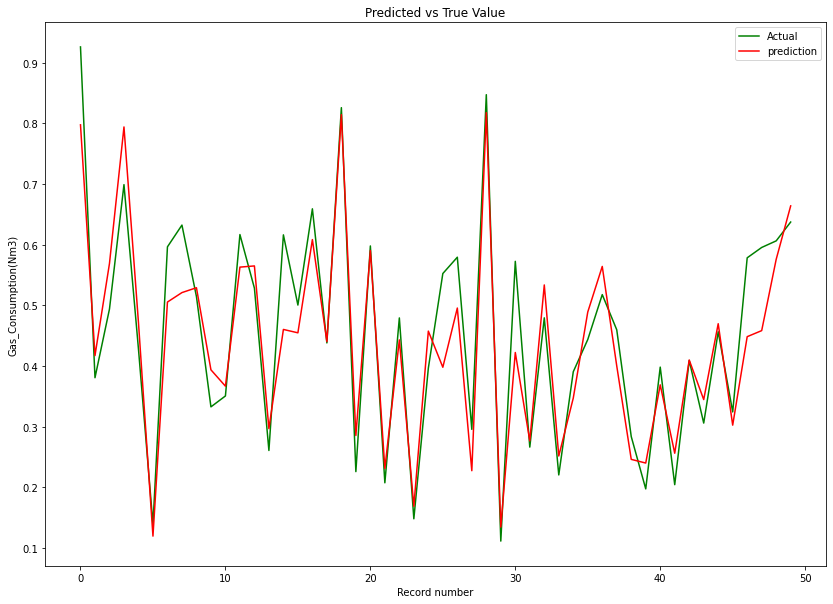

In [118]:
plt.figure(figsize=(14,10))
plt.plot(range(50),y_test[0:50], color = "green")
plt.plot(range(50),pred_y.detach().numpy()[0:50], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(col[-1])
plt.show()